<a href="https://colab.research.google.com/github/Szczureczek1983/Applied-Data-Science-with-Python-and-Jupyter/blob/master/Rower_Wiktor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [ ]:
data = pd.read_csv("/content/nyc-east-river-bicycle-counts.csv").drop(["Unnamed: 0","Day"],axis=1)

### cleaning 

In [ ]:
data["Date"] = pd.to_datetime(data["Date"])
data["Precipitation"] = data["Precipitation"].str.replace("(S)","",regex=False)
data["Precipitation"] = data["Precipitation"].str.replace("T","0",regex=False) #zapytac o T
data["Precipitation"] = data["Precipitation"].astype(float)

for col in list(data.columns)[4:8]:
  data[col] = data[col].astype(int)


data = data.drop_duplicates()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 30 non-null     datetime64[ns]
 1   High Temp (°F)       30 non-null     float64       
 2   Low Temp (°F)        30 non-null     float64       
 3   Precipitation        30 non-null     float64       
 4   Brooklyn Bridge      30 non-null     int64         
 5   Manhattan Bridge     30 non-null     int64         
 6   Williamsburg Bridge  30 non-null     int64         
 7   Queensboro Bridge    30 non-null     int64         
 8   Total                30 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 2.3 KB


### nowe cechy

In [ ]:
data["avg_tem"] = data[["High Temp (°F)","Low Temp (°F)"]].mean(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data["Precipitation_cat"] = np.where(data["Precipitation"]>0,1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


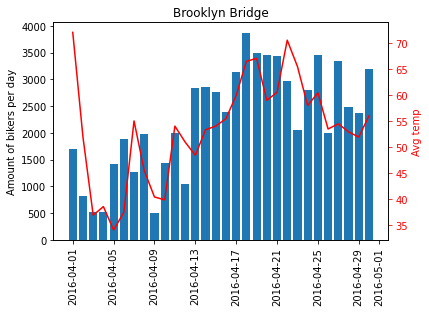

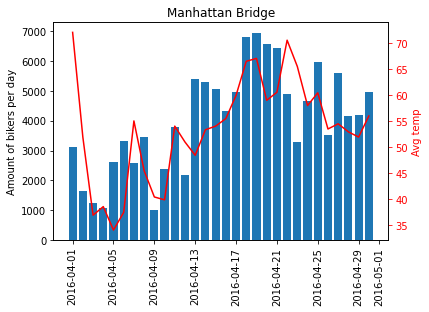

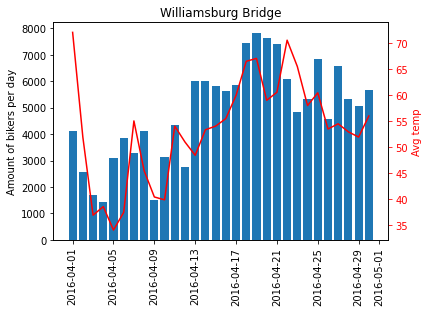

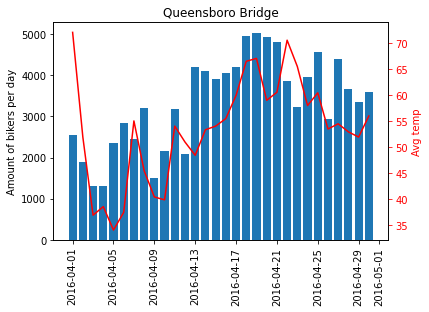

In [ ]:
for col in list(data.columns)[4:8]:

  fig, ax= plt.subplots()

  ax.bar(data["Date"],
        data[col])
  
  ax2=ax.twinx()
  ax2.plot(data["Date"],
           data["avg_tem"], 
           color='r')

  ax.xaxis.set_tick_params(rotation=90)
  ax.set_ylabel("Amount of bikers per day")
  ax2.set_ylabel("Avg temp", color="r")
  ax.set_title(col)
  ax2.tick_params('y', colors='r')
  plt.show()

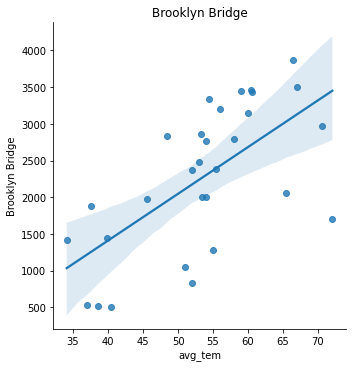

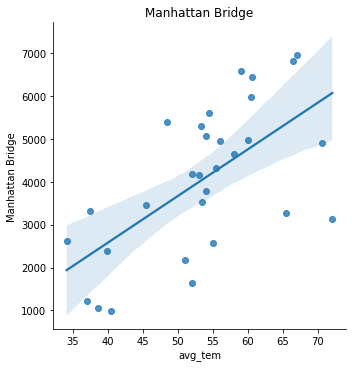

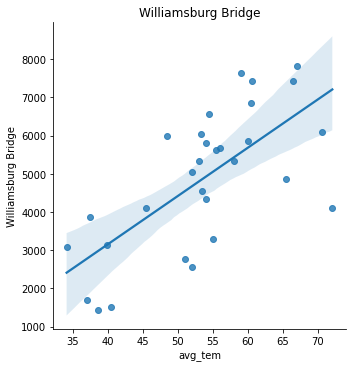

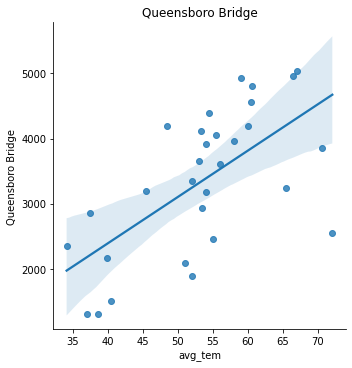

In [ ]:
for col in list(data.columns)[4:8]:

  sns.lmplot(data=data,
            x="avg_tem",
            y =col)
  
  plt.title(col)
  

  plt.show()

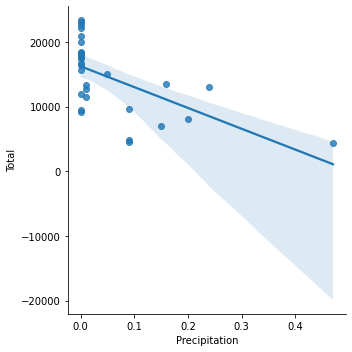

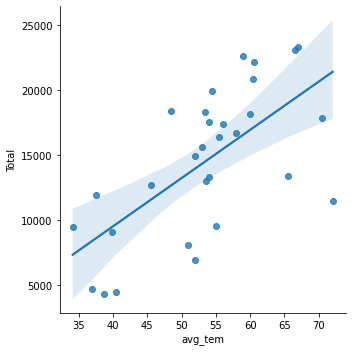

In [ ]:
sns.lmplot(data=data,
            x="Precipitation",
            y ="Total")


sns.lmplot(data=data,
            x="avg_tem",
            y ="Total")

In [ ]:
# data.corr().loc[:,["Total"]].sort_values("Total",key=abs,ascending = False).iloc[5:,:]

for col in list(data.columns)[4:8]:
  display(data.corr().loc[:,[col]].sort_values(col,key=abs,ascending = False).iloc[5:,:])

,Brooklyn Bridge
High Temp (°F),0.739377
Precipitation_cat,-0.724177
avg_tem,0.641702
Precipitation,-0.599514
Low Temp (°F),0.464550


,Manhattan Bridge
High Temp (°F),0.720175
Precipitation_cat,-0.702047
avg_tem,0.631109
Precipitation,-0.588419
Low Temp (°F),0.465097


,Williamsburg Bridge
High Temp (°F),0.764336
avg_tem,0.689353
Precipitation_cat,-0.679340
Precipitation,-0.576076
Low Temp (°F),0.534212


,Queensboro Bridge
High Temp (°F),0.727825
Precipitation_cat,-0.698163
avg_tem,0.640551
Precipitation,-0.596254
Low Temp (°F),0.475725


In [ ]:
data.melt(id_vars = ["Date","Precipitation_cat"],
          value_vars = ["Brooklyn Bridge","Manhattan Bridge","Williamsburg Bridge","Queensboro Bridge"]).\
          groupby(["variable","Precipitation_cat"]).agg({"value":sum}).reset_index()
          
  # .query("Precipitation_cat==1")

,variable,Precipitation_cat,value
0,Brooklyn Bridge,0,51272
1,Brooklyn Bridge,1,16817
2,Manhattan Bridge,0,90439
3,Manhattan Bridge,1,31047
4,Queensboro Bridge,0,71604
5,Queensboro Bridge,1,28982
6,Williamsburg Bridge,0,105593
7,Williamsburg Bridge,1,40281


In [ ]:
melted_df=data.melt(id_vars = ["Date","Precipitation_cat","High Temp (°F)","Low Temp (°F)","Precipitation","avg_tem"],
          value_vars = ["Brooklyn Bridge","Manhattan Bridge","Williamsburg Bridge","Queensboro Bridge"])

In [ ]:
srednie_df = melted_df.groupby("variable").agg({"value":np.mean}).reset_index()
melted_df = pd.merge(melted_df,srednie_df,
         how="left",
         on="variable")

melted_df["nowy_y"] = melted_df["value_x"]/melted_df["value_y"]
melted_df

,Date,Precipitation_cat,High Temp (°F),Low Temp (°F),Precipitation,avg_tem,variable,value_x,value_y,nowy_y
0,2016-04-01,1,78.1,66.0,0.01,72.05,Brooklyn Bridge,1704,2269.633333,0.750782
1,2016-04-02,1,55.0,48.9,0.15,51.95,Brooklyn Bridge,827,2269.633333,0.364376
2,2016-04-03,1,39.9,34.0,0.09,36.95,Brooklyn Bridge,526,2269.633333,0.231755
3,2016-04-04,1,44.1,33.1,0.47,38.60,Brooklyn Bridge,521,2269.633333,0.229552
4,2016-04-05,0,42.1,26.1,0.00,34.10,Brooklyn Bridge,1416,2269.633333,0.623889
...,...,...,...,...,...,...,...,...,...,...
115,2016-04-26,1,60.1,46.9,0.24,53.50,Queensboro Bridge,2929,3352.866667,0.873581
116,2016-04-27,0,62.1,46.9,0.00,54.50,Queensboro Bridge,4388,3352.866667,1.308731
117,2016-04-28,0,57.9,48.0,0.00,52.95,Queensboro Bridge,3657,3352.866667,1.090708
118,2016-04-29,1,57.0,46.9,0.05,51.95,Queensboro Bridge,3348,3352.866667,0.998549


In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_sc = scaler.transform(X_train)

In [ ]:
mosty = ["Brooklyn Bridge","Manhattan Bridge","Williamsburg Bridge","Queensboro Bridge"]
df_mosty = []

for x in mosty:
  df_mosty.append(melted_df[melted_df["variable"]==x])

In [ ]:
X=[]
y=[]

for x in range(len(df_mosty)):
  X.append(df_mosty[x][["High Temp (°F)","Precipitation_cat"]])
  y.append(df_mosty[x][["value_x"]])

In [ ]:
X_train=[]
X_test=[]
y_train=[]
y_test=[]

for x in range(len(df_mosty)):
  X_train.append(train_test_split(X[x].values, test_size=0.2, random_state=123))
  X_test.append(train_test_split(X[x].values, test_size=0.2, random_state=123))
  y_train.append(train_test_split(y[x].values, test_size=0.2, random_state=123))
  y_test.append(train_test_split(y[x].values, test_size=0.2, random_state=123))

In [ ]:
# for x in range(len(df_mosty)):
#   X_train[x]=StandardScaler().fit(X_train[x]).transform(X_train[x])

# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_sc = scaler.transform(X_train)

In [ ]:
model=[]

for x in range(len(df_mosty)):
  temp = LinearRegression().fit(X_train[x][0], y_train[x][0])
  model.append(temp)


In [ ]:
y_est = []

for x in range(len(df_mosty)):
  y_est.append(model[x].predict(X_test[x][0]))


In [ ]:
# bkln = pd.concat([X[0],y[0]],axis=1)
# bkln["y_est"] = model[0].predict(X[0])
# bkln

In [ ]:
errors=[]

for x in range(len(df_mosty)):
  errors.append(mean_absolute_error(y_test[x][0],y_est[x]))

In [ ]:
errors

[345.8530831588235, 748.1162040042046, 725.5638437274974, 424.5978316770841]

In [ ]:
errors_cv_lm=[]

for x in range(len(df_mosty)):

  kfold = KFold(n_splits=10, random_state=21, shuffle=True)
  cv_results = cross_val_score(LinearRegression(),
                             X_train[x][0], y_train[x][0],
                             cv=kfold,
                             scoring='neg_mean_absolute_error')
  
  errors_cv_lm.append(cv_results.mean())



#print('LinearRegressor cv score: ', cv_results.mean(), cv_results.std())

In [ ]:
errors_cv_lm

[-389.0323907722632, -842.16691153434, -819.9757795068726, -478.3468303657696]

In [ ]:
errors_cv_tree=[]


for x in range(len(df_mosty)):

  kfold = KFold(n_splits=10, random_state=21, shuffle=True)
  cv_results = cross_val_score(DecisionTreeRegressor(),
                             X_train[x][0], y_train[x][0],
                             cv=kfold,
                             scoring='neg_mean_absolute_error')
  
  errors_cv_tree.append(cv_results.mean())



In [ ]:
errors_cv_tree

[-448.85555555555555, -980.9833333333333, -983.95, -546.1333333333333]

In [ ]:
for x in range(len(model)):
  print("na moscie", mosty[x], model[x].predict(np.array([[df_mosty[x]["High Temp (°F)"].max(),0],
                                                          [df_mosty[x]["High Temp (°F)"].max(),1],
                                                         [df_mosty[x]["Low Temp (°F)"].min(),0],
                                                         [df_mosty[x]["Low Temp (°F)"].min(),1]])))

na moscie Brooklyn Bridge [[3682.66780834]
 [2625.06517056]
 [ 833.78283386]
 [-223.81980392]]
na moscie Manhattan Bridge [[6482.97327857]
 [4613.9325622 ]
 [1811.73480818]
 [ -57.30590819]]
na moscie Williamsburg Bridge [[7564.37206477]
 [5781.43011394]
 [2030.56173584]
 [ 247.61978501]]
na moscie Queensboro Bridge [[4973.71809031]
 [3762.10038685]
 [1786.55347393]
 [ 574.93577047]]


In [ ]:
print(model[0].coef_)
model[0].intercept_

[[   51.89225819 -1057.60263778]]


array([-520.60510483])

In [ ]:
# cv_results = cross_val_score(DecisionTreeRegressor(),
#                              X_train, y_train,
#                              cv=kfold,
#                              scoring='neg_mean_absolute_error')
# print('DecisionTreeRegressor cv score: ', cv_results.mean(), cv_results.std())

In [ ]:
# poly = PolynomialFeatures(degree=3)
# X_poly = poly.fit_transform(X)
# model = LinearRegression()
# model.fit(X_poly, y)

In [ ]:
# model = LinearRegression().fit(X_train, y_train)


# print(model.intercept_)
# print(model.coef_)

In [ ]:
y_est = model.predict(X_test)

print(mean_absolute_error(y_test, y_est))
print(mean_absolute_error(y_test, np.repeat(np.mean(y_test),len(y_est))))

AttributeError: ignored

In [ ]:
# data["avg_total"] = data["Total"].mean()
# data["nowy_y"] = data["Total"] / data["avg_total"]


# X = data[["High Temp (°F)","Precipitation_cat"]]
# y = data[["nowy_y"]]

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)


# model = LinearRegression().fit(X_train, y_train)


# print(model.intercept_)
# print(model.coef_)


# y_est = model.predict(X_test)

# print(mean_absolute_error(y_test, y_est))
# print(mean_absolute_error(y_test, np.repeat(np.mean(y_test),len(y_est))))

In [ ]:
data